<a href="https://colab.research.google.com/github/1nakatan/hello-world/blob/master/%E5%88%9D%E6%9C%9F%E5%80%A4%E3%81%82%E3%82%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#python-control で制御系のシミュレーション！
!pip install slycot
!pip install control

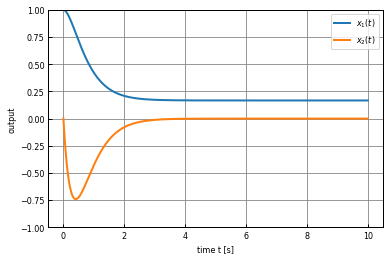

In [0]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#システムの定義
A = [[0, 1],[-6, -5]]
b = [[0],[1]]
c = [[1, 0],[0,1]]  #状態を出力するために単位行列を利用
d = [[0],[0]]       #状態を出力するため

#初期値
x0 = [[1],[0]]

#ステップ応答を評価
sys = ss(A, b, c, d)    #状態空間表現
t = np.arange(0,10,0.01) #時刻0から10s まで　0.01 s 刻み
y,T = step(sys,t,x0)

#表示
plt.plot(T,y[:,0],label='$x_1(t)$', lw=2)  #x1
plt.plot(T,y[:,1],label='$x_2(t)$', lw=2)  #x2
plt.grid(color='gray')
plt.xlabel('time t [s]')
plt.ylabel('output')
plt.ylim([-1, 1])
plt.legend()
plt.show()